<a href="https://colab.research.google.com/github/zemarchezi/SantanderCoders_DataScience/blob/main/Projeto_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final de Machine Learning I - ADA


### Equipe 2

### Bank Marketing Dataset

Gabriel Makhoul - Gabriel Alencar - Zibia Ribeiro - André F. Obenaus - José M.



## 1. Descrição do problema

Encontre as melhores estratégias para melhorar a próxima campanha de marketing. Como pode a instituição
financeira ter uma maior efetividade para campanhas de marketing futuras? Para responder isso, nós precisamos analisar a última campanha de marketing que o banco lançou e identificar os padrões que nos ajudarão a encontrar conclusões para desenvolver futuras estratégias.

1. Entendimento do Problema e Definição de Objetivos

•	Tarefa: Analisar o problema proposto pelo conjunto de dados escolhido. Entender a natureza do problema (classificação binária, multiclasse ou regressão) e definir claramente os objetivos do projeto.

- Nosso problema é tentar entender com base nas variaveis dadas, quais são os consumidores mais sucetiveis a aceitar um produto de investimento em uma ligação de uma campanha de marketing do banco. Assim utilizando tecnicas de machine learning para prever o comportamento de futuros clientes.

# Exploratory Data Analysis

In [ ]:
# importação de bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, recall_score, f1_score, accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#esse trexo de código importa diretamente o código do kaggel sem a necessidade de baixar a base
import kagglehub

# Download latest version
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

df_mk = pd.read_csv('/root/.cache/kagglehub/datasets/janiobachmann/bank-marketing-dataset/versions/1/bank.csv')

100%|██████████| 142k/142k [00:00<00:00, 47.2MB/s]

Extracting files...


| Nome da Variável | Função   | Tipo         | Demografia         | Descrição                                                                                                                         | Unidade | Valores Faltantes |
|------------------|----------|--------------|--------------------|-----------------------------------------------------------------------------------------------------------------------------------|---------|--------------------|
| age              | Feature  | Integer      | Idade              | Idade do cliente                                                                                                                  |         | Não                |
| job              | Feature  | Categorical  | Ocupação           | Tipo de trabalho (categorias: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown') |         | Não                |
| marital          | Feature  | Categorical  | Estado Civil       | Estado civil (categorias: 'divorced', 'married', 'single', 'unknown'; nota: 'divorced' inclui divorciados e viúvos)             |         | Não                |
| education        | Feature  | Categorical  | Nível Educacional  | Nível de educação (categorias: 'primary', 'secondaray', 'tertiary', 'unknown') |         | Não                |
| default          | Feature  | Binary       |                    | Cliente possui crédito em default? Crédito em defalut significa se tem alguma divida em aberto                                                               |         | Não                |
| balance          | Feature  | Integer      |                    | Saldo médio anual                                                                                                                 | Euros   | Não                |
| housing          | Feature  | Binary       |                    | Cliente possui empréstimo habitacional? yes/no                                                                                           |         | Não                |
| loan             | Feature  | Binary       |                    | Cliente possui empréstimo pessoal? yes/no                                                                                                |         | Não                |
| contact          | Feature  | Categorical  |                    | Tipo de comunicação de contato (categorias: 'cellular', 'telephone', 'unknown')                                                             |         | Sim                |
| day      | Feature  | Date         |                    | Dia de contato                                                                                                  |         | Não                |
| month            | Feature  | Date         |                    | Último mês de contato no ano (categorias: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                               |         | Não                |
| duration         | Feature  | Integer      |                    | Duração do último contato em segundos (nota: esta variável afeta fortemente o alvo. Ex.: se duration=0, então y='no'. Essa variável deve ser descartada para um modelo preditivo realista) | Segundos| Não                |
| campaign         | Feature  | Integer      |                    | Número de contatos realizados durante esta campanha para este cliente                                                             |         | Não                |
| pdays            | Feature  | Integer      |                    | Número de dias desde que o cliente foi contatado pela última vez em uma campanha anterior (-1 significa que o cliente não foi contatado antes) |         | Sim                |
| previous         | Feature  | Integer      |                    | Número de contatos realizados antes desta campanha para este cliente                                                              |         | Não                |
| poutcome         | Feature  | Categorical  |                    | Resultado da campanha de marketing anterior (categorias: 'failure', 'unknown', 'success')                                   |         | Sim                |
| deposit                | Target   | Binary       |                    | O cliente assinou um depósito a prazo?                                                                                           |         |                    |


In [ ]:
df_mk.head(13)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [ ]:
df_mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


aplicar o chi² nas colunas individualmente vs o target - tirar conclusão

p valor

avaliar importancia das features no modelo usando árvore- treinar com variaves nao combinadas e combinadas - no decision tree feature importance --->

ordinary encoder = targt encoder para variaveis binarias - one hot encoder?

préprocessamento

escala

roda modelo

------ talvez imputar pela moda valores unknown - simple imputer   - knn imputer?

cross validation no arvore de decisão

KNN computacionalmente custoso

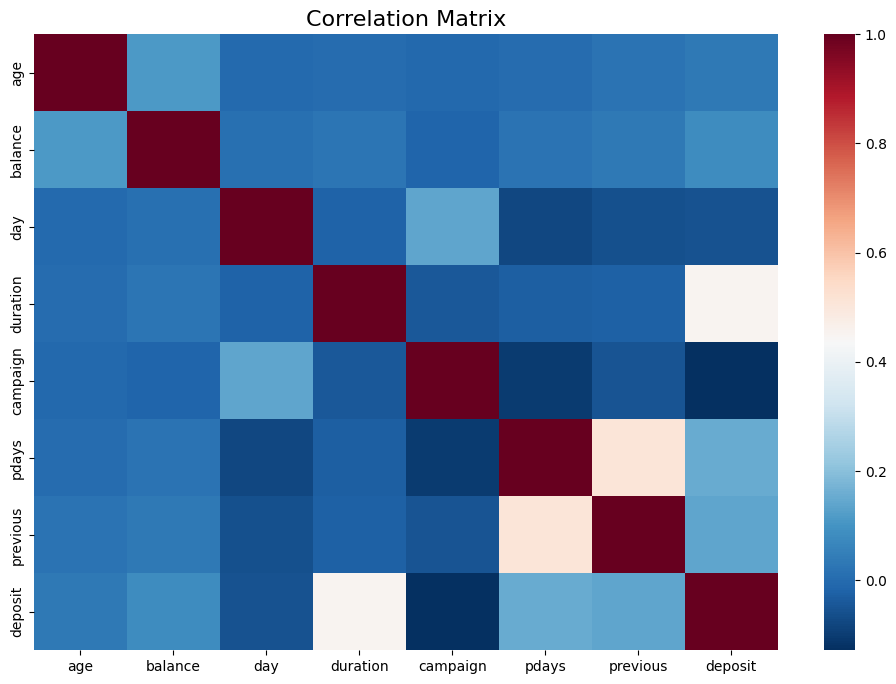

In [ ]:
fig = plt.figure(figsize=(12,8))
df_mk['deposit'] = LabelEncoder().fit_transform(df_mk['deposit'])

# Separate both dataframes into
numeric_df = df_mk.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()

sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

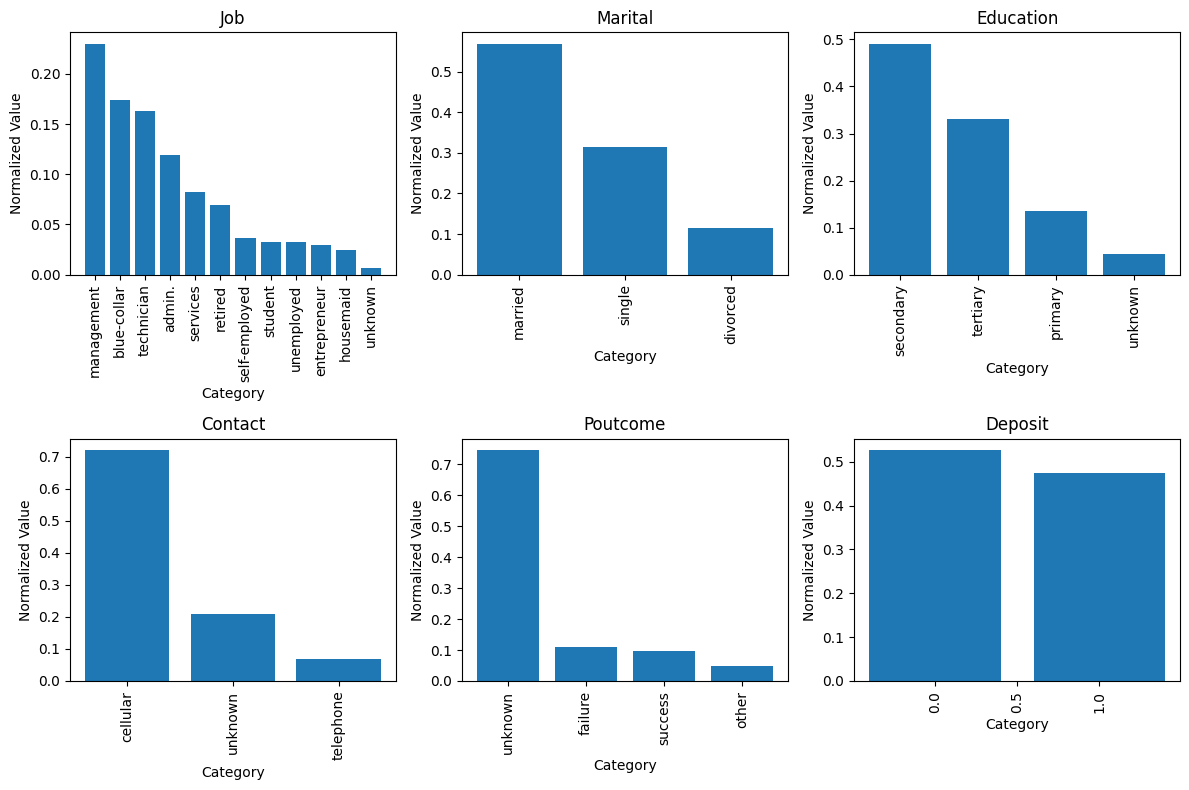

In [ ]:
# Dados e titulos para os gráficos
# Assuming df_mk is your DataFrame
x = df_mk.job.value_counts(normalize=True)
y = df_mk.marital.value_counts(normalize=True)
z = df_mk.education.value_counts(normalize=True)
a = df_mk.contact.value_counts(normalize=True)
b = df_mk.poutcome.value_counts(normalize=True)
c = df_mk.deposit.value_counts(normalize=True)

# Data and titles for plotting
data = [x, y, z, a, b, c]
titles = ['Job', 'Marital', 'Education', 'Contact', 'Poutcome', 'Deposit']

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot each normalized value count as a histogram
for i, ax in enumerate(axs.flatten()):
    ax.bar(data[i].index, data[i].values)
    ax.set_title(titles[i])
    ax.set_xlabel('Category')
    ax.set_ylabel('Normalized Value')
    ax.tick_params(axis='x', rotation=90)  # Correct rotation for x-ticks

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

In [ ]:
# prompt: lets check the chi squered of the target 'deposit' column versus the other columns

from scipy.stats import chi2_contingency

def calculate_chi2(df, target_column):
    results = {}
    for column in df.columns:
        if column != target_column:
            contingency_table = pd.crosstab(df[column], df[target_column])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            results[column] = {'chi2': chi2, 'p-value': p}
    return results

chi2_results = calculate_chi2(df_mk, 'deposit')

for column, values in chi2_results.items():
    print(f"Column: {column}")
    print(f"  Chi-squared: {values['chi2']}")
    print(f"  p-value: {values['p-value']}")
    print("-" * 20)

Column: age
  Chi-squared: 581.5816599589007
  p-value: 2.1711069702818387e-79
--------------------
Column: job
  Chi-squared: 378.0752558664989
  p-value: 2.741689587081072e-74
--------------------
Column: marital
  Chi-squared: 109.58335610012479
  p-value: 1.600576988089358e-24
--------------------
Column: education
  Chi-squared: 122.77008967211442
  p-value: 1.9534186354212715e-26
--------------------
Column: default
  Chi-squared: 17.808573693473093
  p-value: 2.4428001791928345e-05
--------------------
Column: balance
  Chi-squared: 4565.609063544128
  p-value: 1.0495593296697213e-16
--------------------
Column: housing
  Chi-squared: 463.1892407533161
  p-value: 9.724394114495535e-103
--------------------
Column: loan
  Chi-squared: 135.83217051738103
  p-value: 2.171286879630289e-31
--------------------
Column: contact
  Chi-squared: 736.6866796046972
  p-value: 1.0728032438445805e-160
--------------------
Column: day
  Chi-squared: 363.89569108786134
  p-value: 5.181588008775

# Tatamento de Dados

In [ ]:
#por falta de tempo iremos tratar valores unknown como se fossem a moda
#começando pela coluna de job

df_mk['job'] = df_mk['job'].replace('unknown', df_mk['job'].mode()[0])
#gora com education
df_mk['education'] = df_mk['education'].replace('unknown', df_mk['education'].mode()[0])
#e com contact
df_mk['contact'] = df_mk['contact'].replace('unknown', df_mk['contact'].mode()[0])

#não trataremos o poutcome pois tem um volume muito grande de unkown

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder object
ordinal_encoder = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']])

# Fit and transform the 'education' column
df_mk['education_encoded'] = ordinal_encoder.fit_transform(df_mk[['education']])

#print(df_mk[['education', 'education_encoded']].head())

df_mk.drop('education', axis=1, inplace=True)

# Árvore de Decisão

Primeiramente, fazemos uma arvore de decisão para entender quais são as variaveis mais importantes no algoritimo.
Nesse sentido, não há necessidade de fazer uma separação de amostragem.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Transformando as variavies categoricas em número
le = LabelEncoder()

#no caso labelencoder transforma as variaveis e as ordena, para algoritimos lineares não é o ideal, porém pelo pesquisado não afeta muito arvore de decisção, evitamos one hot encoding para não aumentar a cardinalidade do problema
for col in df_mk.select_dtypes(include=['object']).columns:
    df_mk[col] = le.fit_transform(df_mk[col])


In [ ]:
# Separamos o target das variaveis
X = df_mk.drop('deposit', axis=1)
y = df_mk['deposit']

In [ ]:
# Fit Decision Tree - rodando o algoritimo - Se não limitarmos a profundidade da arvore ela irá overfitar!!!
for i in range(1, 20):
  tree = DecisionTreeClassifier(max_depth=i, random_state=42)
  tree.fit(X, y)
  print(f"Acurácia da árvore de decisão com profundidade {i}: {tree.score(X, y)}")
# escolhemos uma acuracia de 80% para seguir, um bom mix de acuracia sem dar over fit ao nosso ver
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X, y)

Acurácia da árvore de decisão com profundidade 1: 0.7112524637161799
Acurácia da árvore de decisão com profundidade 2: 0.7112524637161799
Acurácia da árvore de decisão com profundidade 3: 0.7766529295825121
Acurácia da árvore de decisão com profundidade 4: 0.7879412291703995
Acurácia da árvore de decisão com profundidade 5: 0.8046944991936928
Acurácia da árvore de decisão com profundidade 6: 0.8225228453682136
Acurácia da árvore de decisão com profundidade 7: 0.8320193513707221
Acurácia da árvore de decisão com profundidade 8: 0.8440243683927612
Acurácia da árvore de decisão com profundidade 9: 0.8569252822074896
Acurácia da árvore de decisão com profundidade 10: 0.8752015767783551
Acurácia da árvore de decisão com profundidade 11: 0.8921340261601863
Acurácia da árvore de decisão com profundidade 12: 0.9061100161261423
Acurácia da árvore de decisão com profundidade 13: 0.9225049274323598
Acurácia da árvore de decisão com profundidade 14: 0.9380039419458879
Acurácia da árvore de decisão

DecisionTreeClassifier(max_depth=5, random_state=42)

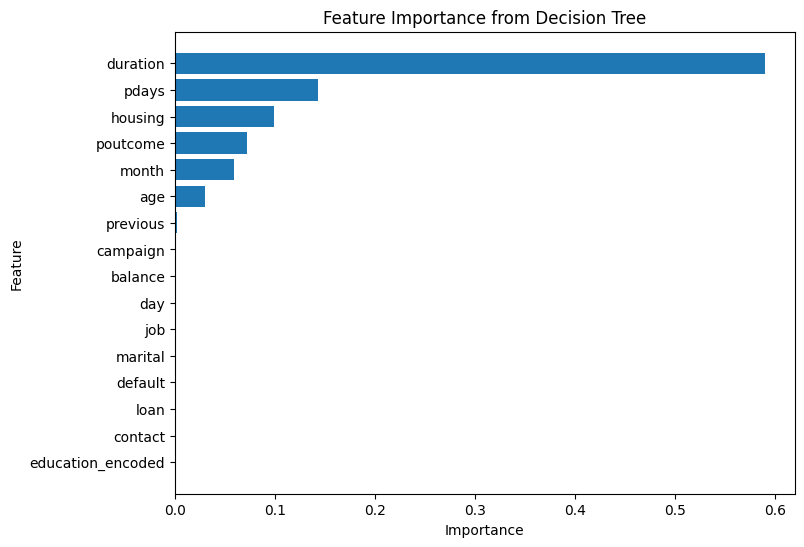

In [ ]:
# Entendendo a importancia das variáveis
# Pegamos a importancia
feature_importances = tree.feature_importances_
feature_names = X.columns
# Colocando os valores no dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotando em um gráfico
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Colocando um limite para as variáveis
importance_threshold = 0.05

# PEgando as variáveis que são importante
important_features = importance_df[importance_df['Importance'] >= importance_threshold]['Feature'].tolist()

# Jogando fora as variáveis que não são tão importantes
X = X[important_features]

X.columns

Index(['duration', 'pdays', 'housing', 'poutcome', 'month'], dtype='object')

In [ ]:
# Rodamos o algoritimo denovo? <- não acho que seja necessario mas curioso
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

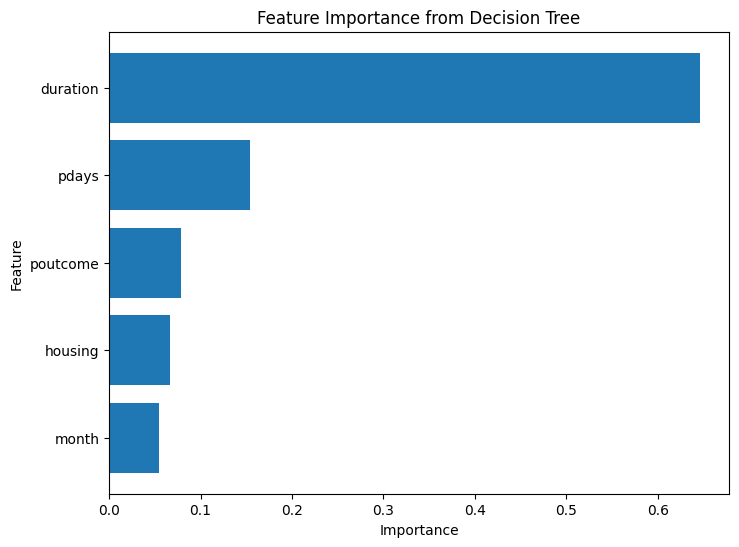

In [ ]:
# Repetimos o processo de entender a importancia agora só de curioso
feature_importances = tree.feature_importances_
feature_names = X.columns
# Colocando os valores no dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotando em um gráfico
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# Não sei se faz sentido a variável duração, no sentido de produtização, se precisamos escolher um cliente para fazer uma ligação, como saberemos quanto tempo dura a ligação antes de ligar para ele?
# Vamos continuar com ele por hora pois obviamente é a mais importante, mas ao final queremos rodar o algoritimo sem ele para entender o impacto

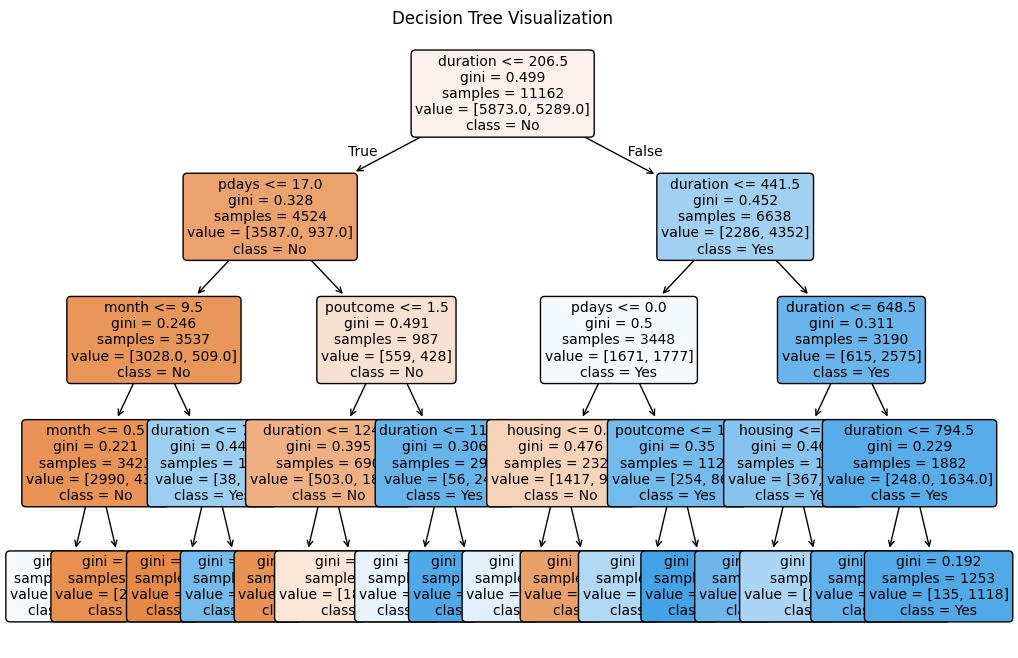

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Plotando a arvore de curioso
plt.figure(figsize=(12, 8))
plot_tree(tree,
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
#separando os dados para treinar o algoritimo, lembrando X está "limpo"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for i in range(1, 20):
  tree = DecisionTreeClassifier(max_depth=i, random_state=42)
  tree.fit(X_train, y_train)
  print(f"Acurácia da árvore de decisão com profundidade {i}: {tree.score(X_test, y_test)}")
#manteramos a profundidade 7 por retornar a melhor acuracia
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

Acurácia da árvore de decisão com profundidade 1: 0.6950291088222122
Acurácia da árvore de decisão com profundidade 2: 0.6950291088222122
Acurácia da árvore de decisão com profundidade 3: 0.7684729064039408
Acurácia da árvore de decisão com profundidade 4: 0.7801164352888491
Acurácia da árvore de decisão com profundidade 5: 0.7917599641737573
Acurácia da árvore de decisão com profundidade 6: 0.7944469323779668
Acurácia da árvore de decisão com profundidade 7: 0.7971339005821765
Acurácia da árvore de decisão com profundidade 8: 0.7863860277653381
Acurácia da árvore de decisão com profundidade 9: 0.7886251679355127
Acurácia da árvore de decisão com profundidade 10: 0.7926556202418271
Acurácia da árvore de decisão com profundidade 11: 0.7814599193909538
Acurácia da árvore de decisão com profundidade 12: 0.7760859829825347
Acurácia da árvore de decisão com profundidade 13: 0.7711598746081505
Acurácia da árvore de decisão com profundidade 14: 0.7693685624720108
Acurácia da árvore de decisão

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
model = DecisionTreeClassifier(max_depth=7, random_state=42)
# 5 folds para validação
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Pegando os scores dos "folds"
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
scores2 = cross_val_score(model, X, y, cv=kf, scoring='f1')

# Print para
print(f"Acuracia para cada fold: {scores}")
print(f"Acuracia para cada fold: {scores2}")
print(f"Média: {np.mean(scores):.4f}")

Acuracia para cada fold: [0.7971339  0.81012091 0.80510753 0.81765233 0.81227599]
Acuracia para cada fold: [0.78940028 0.81037567 0.78995654 0.80136652 0.79570941]
Média: 0.8085


              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1166
           1       0.75      0.84      0.79      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.80      0.79      0.79      2233

deposit
0    0.52616
1    0.47384
Name: proportion, dtype: float64


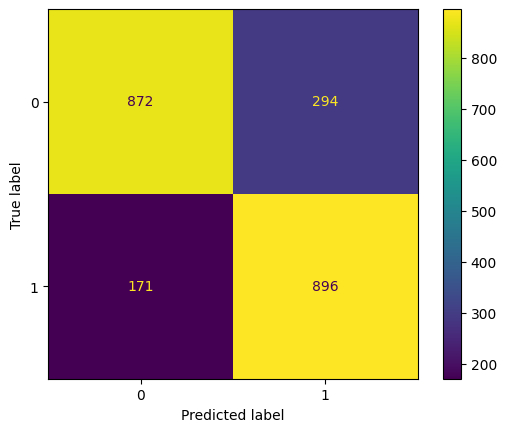

In [ ]:
# Usar o modelo no resto da base
y_pred = tree.predict(X_test)

# Avaliação do modelot
print(classification_report(y_test, y_pred))

# Cruzar contra a razão de Positivos na base de dados - Insight importante!!! Desssa base ao pegarmos uma ligação aleatoria, temos 50% de chance de ter sucesso na ligação, com nosso modelo temos 80%!!!
print(df_mk.deposit.value_counts(normalize=True))

# Rodar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Pequeno "detour" sem muitos comentários vamos tentar rodar o algoritimo sem a duração da ligação

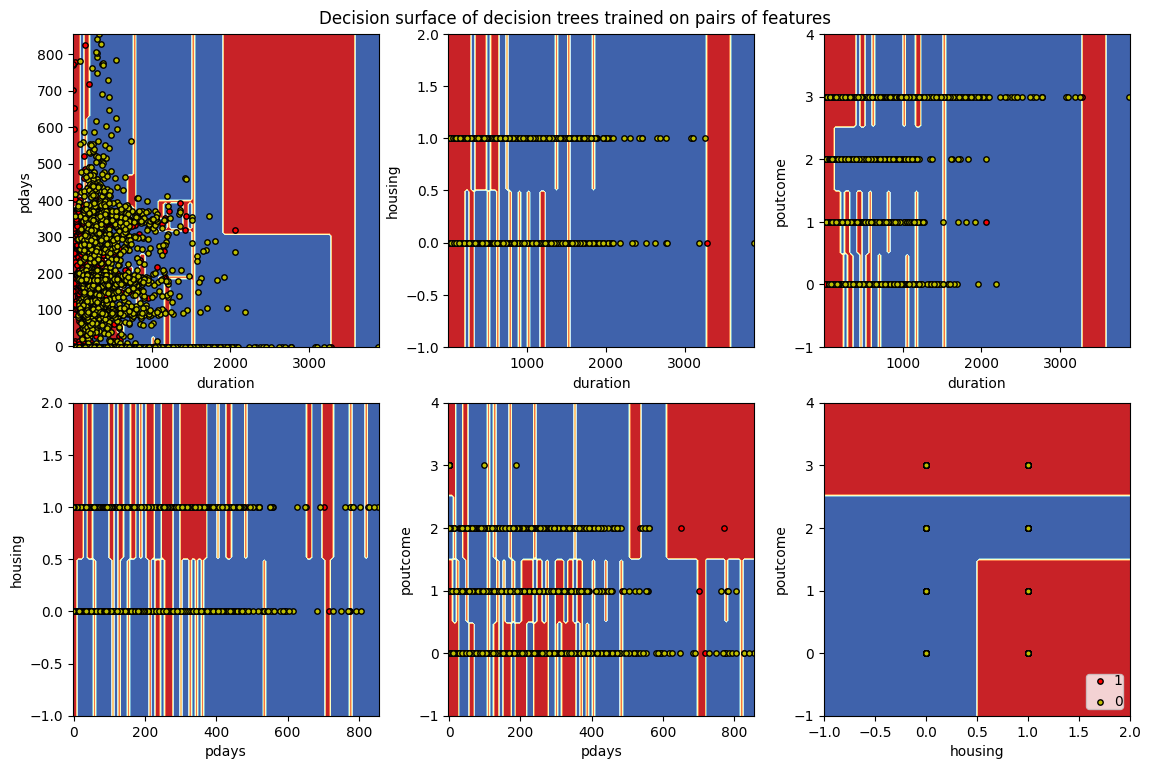

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

feature_names = X.columns
target_names = y.unique()

# Parameters
n_classes = len(target_names)
plot_colors = "ryb"  # Add more colors if you have more classes
plot_step = 0.02

plt.figure(figsize=(12, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # Select the pair of features
    X_pair = X.iloc[:, pair]
    y_pair = y

    # Train classifier
    clf = DecisionTreeClassifier().fit(X_pair, y_pair)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_pair,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=feature_names[pair[0]],
        ylabel=feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_pair == i)
        plt.scatter(
            X_pair.iloc[idx[0], 0],
            X_pair.iloc[idx[0], 1],
            c=color,
            label=str(target_names[i]),
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

In [ ]:
# Separamos o target das variaveis - reaproveitando código
X = df_mk.drop('deposit', axis=1)
y = df_mk['deposit']
#jogando fora duração <--- !!!
X = X.drop('duration', axis=1)

In [ ]:
# Fit Decision Tree - rodando o algoritimo - Se não limitarmos a profundidade da arvore ela irá overfitar!!!
for i in range(1, 20):
  tree = DecisionTreeClassifier(max_depth=i, random_state=42)
  tree.fit(X, y)
  print(f"Acurácia da árvore de decisão com profundidade {i}: {tree.score(X, y)}")
# escolhemos uma acuracia de 70% para seguir, um bom mix de acuracia sem dar over fit ao nosso ver
tree = DecisionTreeClassifier(max_depth=7, random_state=42)
tree.fit(X, y)

Acurácia da árvore de decisão com profundidade 1: 0.6136893029922953
Acurácia da árvore de decisão com profundidade 2: 0.6136893029922953
Acurácia da árvore de decisão com profundidade 3: 0.6549005554560114
Acurácia da árvore de decisão com profundidade 4: 0.6726393119512633
Acurácia da árvore de decisão com profundidade 5: 0.6906468374843218
Acurácia da árvore de decisão com profundidade 6: 0.6983515499014513
Acurácia da árvore de decisão com profundidade 7: 0.7091919010929941
Acurácia da árvore de decisão com profundidade 8: 0.72316789105895
Acurácia da árvore de decisão com profundidade 9: 0.7366063429492923
Acurácia da árvore de decisão com profundidade 10: 0.752463716179896
Acurácia da árvore de decisão com profundidade 11: 0.7710087797885684
Acurácia da árvore de decisão com profundidade 12: 0.7874036910947859
Acurácia da árvore de decisão com profundidade 13: 0.806307113420534
Acurácia da árvore de decisão com profundidade 14: 0.8289733022755779
Acurácia da árvore de decisão com

DecisionTreeClassifier(max_depth=7, random_state=42)

Acurácia cai muito!!! vamos pegar o limite do aceitavel pelos livros 70%

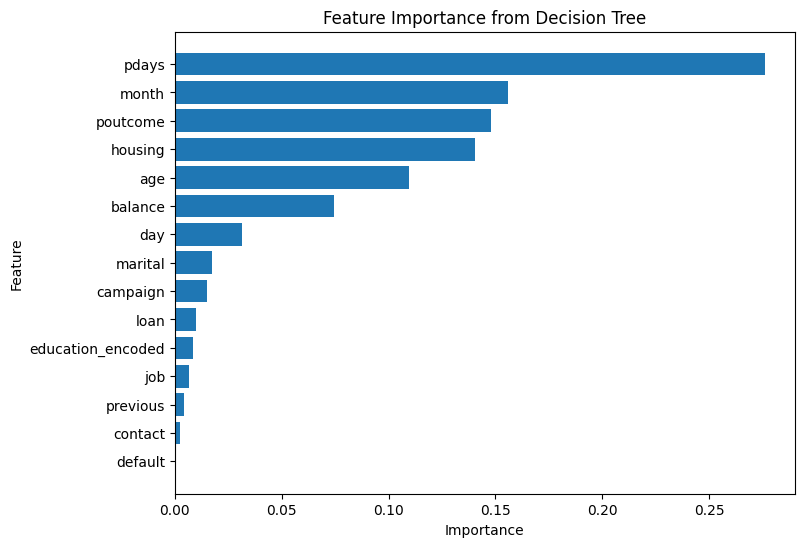

In [ ]:
# Entendendo a importancia das variáveis
# Pegamos a importancia
feature_importances = tree.feature_importances_
feature_names = X.columns
# Colocando os valores no dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotando em um gráfico
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Colocando um limite para as variáveis
importance_threshold = 0.05

# PEgando as variáveis que são importante
important_features = importance_df[importance_df['Importance'] >= importance_threshold]['Feature'].tolist()

# Jogando fora as variáveis que não são tão importantes
X = X[important_features]

X.columns

Index(['pdays', 'month', 'poutcome', 'housing', 'age', 'balance'], dtype='object')

In [ ]:
#separando os dados para treinar o algoritimo, lembrando X está "limpo"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for i in range(1, 20):
  tree = DecisionTreeClassifier(max_depth=i, random_state=42)
  tree.fit(X_train, y_train)
  print(f"Acurácia da árvore de decisão com profundidade {i}: {tree.score(X_test, y_test)}")
#manteramos a profundidade 7 poi dai pra frente os ganhos não compensam a possivel perda
tree = DecisionTreeClassifier(max_depth=7, random_state=42)
tree.fit(X_train, y_train)

Acurácia da árvore de decisão com profundidade 1: 0.6117330944917152
Acurácia da árvore de decisão com profundidade 2: 0.6283027317510076
Acurácia da árvore de decisão com profundidade 3: 0.6609941782355575
Acurácia da árvore de decisão com profundidade 4: 0.6789072995969547
Acurácia da árvore de decisão com profundidade 5: 0.6789072995969547
Acurácia da árvore de decisão com profundidade 6: 0.6784594715629199
Acurácia da árvore de decisão com profundidade 7: 0.690550828481863
Acurácia da árvore de decisão com profundidade 8: 0.696820420958352
Acurácia da árvore de decisão com profundidade 9: 0.6963725929243171
Acurácia da árvore de decisão com profundidade 10: 0.6959247648902821
Acurácia da árvore de decisão com profundidade 11: 0.6918943125839677
Acurácia da árvore de decisão com profundidade 12: 0.683833407971339
Acurácia da árvore de decisão com profundidade 13: 0.6780116435288849
Acurácia da árvore de decisão com profundidade 14: 0.6681594267801164
Acurácia da árvore de decisão co

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
model = DecisionTreeClassifier(max_depth=7, random_state=42)
# 5 folds para validação
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Pegando os scores dos "folds"
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

# Print para
print(f"Acuracia para cada fold: {scores}")
print(f"Média: {np.mean(scores):.4f}")

Acuracia para cada fold: [0.67637178 0.67413214 0.69428891 0.68756999 0.69131653]
Média: 0.6847


              precision    recall  f1-score   support

           0       0.65      0.89      0.75      1166
           1       0.80      0.47      0.59      1067

    accuracy                           0.69      2233
   macro avg       0.72      0.68      0.67      2233
weighted avg       0.72      0.69      0.67      2233

deposit
0    0.52616
1    0.47384
Name: proportion, dtype: float64


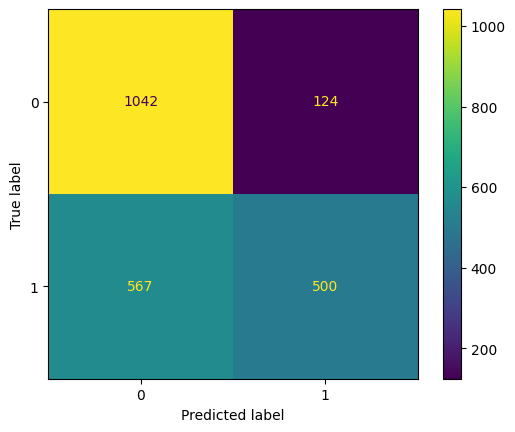

In [ ]:
# Usar o modelo no resto da base
y_pred = tree.predict(X_test)

# Avaliação do modelot
print(classification_report(y_test, y_pred))

# Cruzar contra a razão de Positivos na base de dados - Insight importante!!! Desssa base ao pegarmos uma ligação aleatoria, temos 50% de chance de ter sucesso na ligação, com nosso modelo temos 80%!!!
print(df_mk.deposit.value_counts(normalize=True))

# Rodar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Vemos agora que o modelo piora muito!  No acerto é quase 50% como na base original, porém estranhamente ele ainda pode ser bem utilziado para ignorar clientes não interessados

# Regressão Logistica

In [ ]:
df_mk = pd.read_csv('/root/.cache/kagglehub/datasets/janiobachmann/bank-marketing-dataset/versions/1/bank.csv')

In [ ]:
# Separando o target das variaveis
X = df_mk.drop('deposit', axis=1)
y = df_mk['deposit']

In [ ]:
# Aplicando One-Hot Encoding nas colunas 'job', 'marital' e 'contact'
# Essas colunas não têm ordem hierárquica, então são transformadas em variáveis binárias
# drop_first=True é usado para evitar a multicolinearidade, removendo a primeira coluna de cada conjunto codificado
X = pd.get_dummies(X, columns=['job', 'marital', 'contact', 'month'], drop_first=True)

In [ ]:
# Importando as classes necessárias para codificação de variáveis categóricas
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

# Definindo as colunas que possuem uma ordem intrínseca
# Essas colunas serão tratadas com Ordinal Encoding, pois têm categorias que seguem uma hierarquia lógica
ordinal_features = ['education', 'default', 'housing', 'loan', 'poutcome']

# Especificando a ordem das categorias para cada uma das colunas ordinal_features
# Abaixo estão as ordens definidas manualmente com base na lógica de cada categoria

# Ordem educacional, onde 'primary' < 'secondary' < 'tertiary'
education_order = ['primary', 'secondary', 'tertiary']

# Ordem para 'default' (inadimplência), 'no' é menor que 'yes'
default_order = ['no', 'yes']

# Ordem para 'housing' (tem ou não uma hipoteca), onde 'no' vem antes de 'yes'
housing_order = ['no', 'yes']

# Ordem para 'loan' (tem ou não um empréstimo pessoal), onde 'no' vem antes de 'yes'
loan_order = ['no', 'yes']

# Ordem para o resultado de campanhas de marketing anteriores, onde 'unknown' < 'failure' < 'other' < 'success'
poutcome_order = ['unknown', 'failure', 'other', 'success']

# Aplicando Ordinal Encoding nas colunas com ordem intrínseca, especificando o tratamento para valores desconhecidos
# handle_unknown="use_encoded_value" define como lidar com categorias desconhecidas, onde unknown_value=-1 define o valor para categorias desconhecidas
encoder = OrdinalEncoder(categories=[education_order, default_order, housing_order, loan_order, poutcome_order],
                         handle_unknown="use_encoded_value", unknown_value=-1)

# Transformando as colunas em ordinal_features para valores numéricos com base na ordem especificada acima
X[ordinal_features] = encoder.fit_transform(X[ordinal_features])

# Criando uma instância do StandardScaler
scaler = StandardScaler()

# Ajustando o scaler e transformando os dados para normalizar todas as colunas de X
X = scaler.fit_transform(X)

In [ ]:
# Dividindo os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Importando a biblioteca necessária para Regressão Logística
from sklearn.linear_model import LogisticRegression

# Inicializando o modelo de Regressão Logística
logreg = LogisticRegression()

# Ajustando o modelo com os dados de treino
logreg.fit(X_train, y_train)

# Realizando previsões com o modelo
y_pred = logreg.predict(X_test)

In [ ]:
# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo de Regressão Logística:", logreg.score(X_test, y_test), "\n")

Acurácia do modelo de Regressão Logística: 0.8231079265562025 



# Matriz de Confusão Métricas

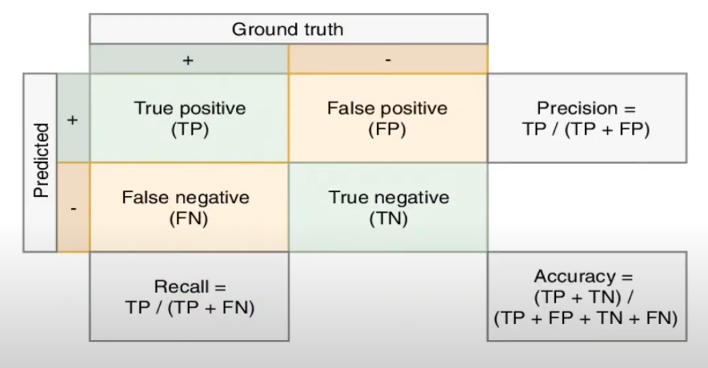

Relatório de Classificação:
              precision    recall  f1-score   support

          no       0.82      0.85      0.83      1175
         yes       0.82      0.80      0.81      1058

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



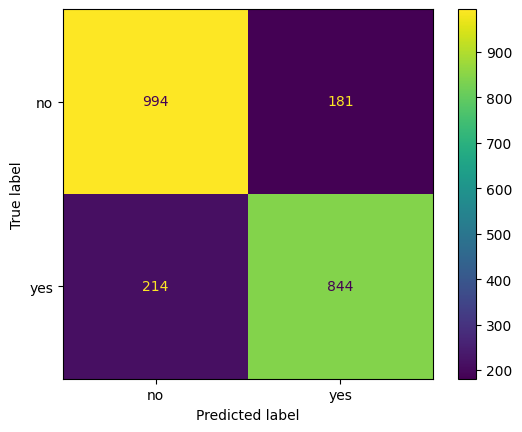

In [ ]:
# Matriz de Confusão
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

# Exibindo relatório de classificação com métricas detalhadas
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Curva ROC

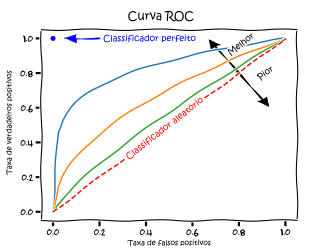

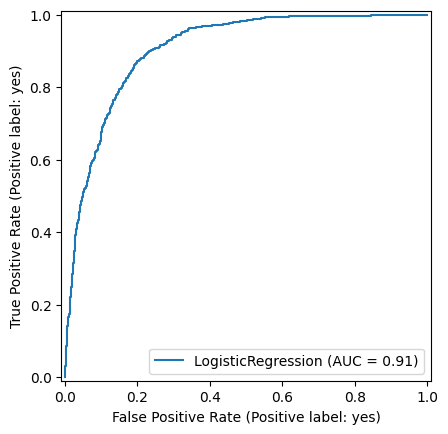

In [ ]:
# Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg, X_test, y_test, ax=plt.gca())

Variância explicada pelo primeiro componente principal: 0.07
Variância explicada pelo segundo componente principal: 0.07


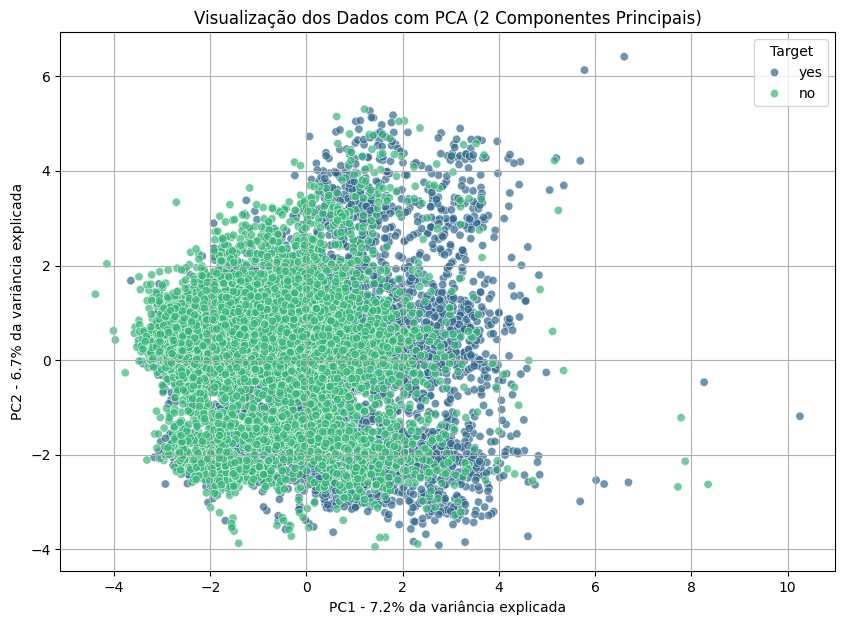

In [ ]:
from sklearn.decomposition import PCA

# Passo 1: Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Aplicando o escalonamento nos dados codificados

# Passo 2: Aplicar o PCA
pca = PCA(n_components=2)  # Usando 2 componentes para visualização
X_pca = pca.fit_transform(X_scaled)

# Verificando a variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f'Variância explicada pelo primeiro componente principal: {explained_variance[0]:.2f}')
print(f'Variância explicada pelo segundo componente principal: {explained_variance[1]:.2f}')

# Passo 3: Visualizar os componentes principais
# Convertendo os componentes principais para um DataFrame para facilitar o uso no Seaborn
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y  # Adicionando a coluna alvo para diferenciação na visualização

# Plotar os componentes principais
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='viridis', alpha=0.7)
plt.title('Visualização dos Dados com PCA (2 Componentes Principais)')
plt.xlabel(f'PC1 - {explained_variance[0]*100:.1f}% da variância explicada')
plt.ylabel(f'PC2 - {explained_variance[1]*100:.1f}% da variância explicada')
plt.legend(title='Target')
plt.grid(True)
plt.show()

# KNN

In [ ]:
df_mk = pd.read_csv('/root/.cache/kagglehub/datasets/janiobachmann/bank-marketing-dataset/versions/1/bank.csv')

In [ ]:
# separando a base do target
X, y = df_mk.drop(columns='deposit'), df_mk['deposit']

In [ ]:
# separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)

In [ ]:
# aqui foi feito um pre processamento dos dados para conseguir usar o KNN, principalmente nas colunas
# de categorias, que contém strings

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']),
        ('cat', OneHotEncoder(), ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
    ]
)

In [ ]:
# as próximas células são para testar qual será o melhor parametro n_neighbors para usar no KNN

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

In [ ]:
param_grid = {'knn__n_neighbors': range(1, 31)}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)
print(f"Best n_neighbors: {grid_search.best_params_['knn__n_neighbors']}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best n_neighbors: 11
Best cross-validation score: 0.8105037939027795


In [ ]:
best_knn = grid_search.best_estimator_
test_score = best_knn.score(X_test, y_test)
print(f"Test set score with best n_neighbors: {test_score}")

Test set score with best n_neighbors: 0.8240035826242723


In [ ]:
# agora já com o n_neighbors definido, seguimos

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=11))
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('knn', KNeighborsClassifier(n_neighbors=11))])

In [ ]:
y_pred_test = pipe.predict(X_test)

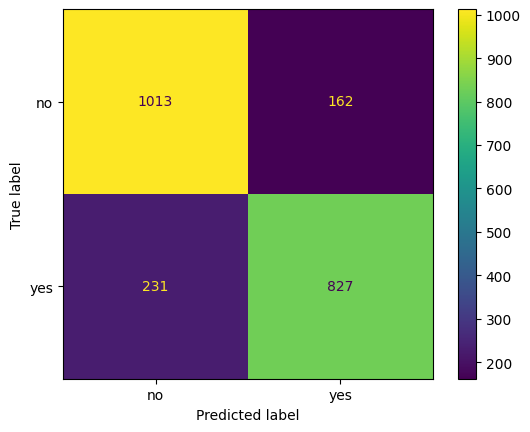

              precision    recall  f1-score   support

          no       0.81      0.86      0.84      1175
         yes       0.84      0.78      0.81      1058

    accuracy                           0.82      2233
   macro avg       0.83      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233


# ====================



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))


print("\n# ====================\n")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier(n_neighbors=11))
])

In [ ]:
param_grid = {'pca__n_components': range(5, 10)}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)
print(f"Best numero de colunas: {grid_search.best_params_['pca__n_components']}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best numero de colunas: 7
Best cross-validation score: 0.7968410387671305


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=7)),
    ('knn', KNeighborsClassifier(n_neighbors=11))
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('pca', PCA(n_components=7)),
                ('knn', KNeighborsClassifier(n_neighbors=11))])

In [ ]:
y_pred_test = pipe.predict(X_test)

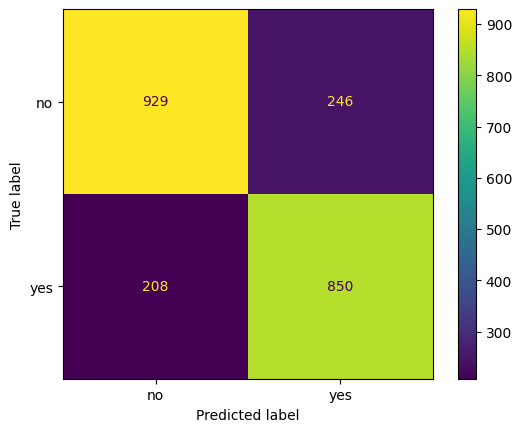

              precision    recall  f1-score   support

          no       0.82      0.79      0.80      1175
         yes       0.78      0.80      0.79      1058

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233


# ====================



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))


print("\n# ====================\n")

In [ ]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier(n_neighbors=11))
])

In [ ]:
# If your labels are categorical, encode them as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
pipe.fit(X, y_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('pca', PCA(n_components=2)),
                ('knn', KNeighborsClassifier(n_neighbors=11))])

In [ ]:
# Transform data to 2D with PCA for plotting
X_transformed = pipe.named_steps['pca'].transform(preprocessor.fit_transform(X))

In [ ]:
x_min, x_max = X_transformed[:, 0].min() - 1, X_transformed[:, 0].max() + 1
y_min, y_max = X_transformed[:, 1].min() - 1, X_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [ ]:
# Predict on mesh points for boundary visualization
Z = pipe.named_steps['knn'].predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

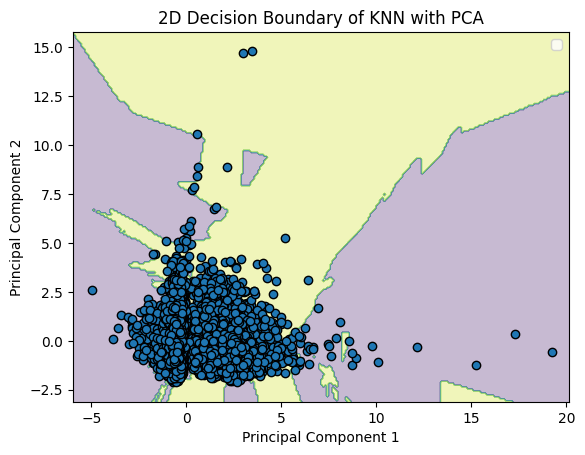

In [ ]:
# Plot the decision boundaries and the points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], cmap='viridis', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D Decision Boundary of KNN with PCA")
plt.legend(handles=scatter.legend_elements()[0], labels=np.unique(y))
plt.show()